<a href="https://colab.research.google.com/github/Nikhileswar-Komati/Deep-Learning/blob/master/DL_LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = {   "arr" : np.random.normal(scale = 10, size = 100) }
df = pd.DataFrame(data)
df.sample(5)

,arr
96,-8.160565
91,3.757038
51,0.622693
82,-9.826002
67,8.646721


In [3]:
def sigmoid(val):
  return 1 / (1 + np.exp(-val))

def relu(val):
  return max(0, val)

def step(val):
  if val >= 0:
    return 1
  return 0

In [4]:
df['sigmoid'] = df['arr'].apply(lambda x: sigmoid(x))

df['relu'] = df['arr'].apply(lambda x: relu(x))

df['step'] = df['arr'].apply(lambda x: step(x))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


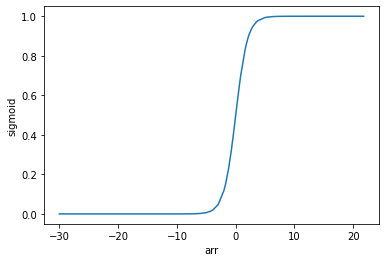

In [5]:
import seaborn as sns
sns.lineplot(x = df['arr'], y = df['sigmoid'])

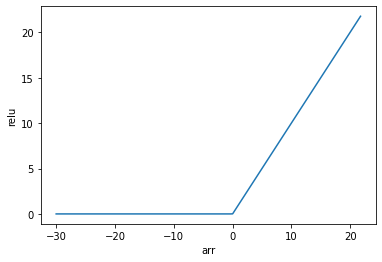

In [6]:
sns.lineplot(x = df['arr'], y = df['relu'])

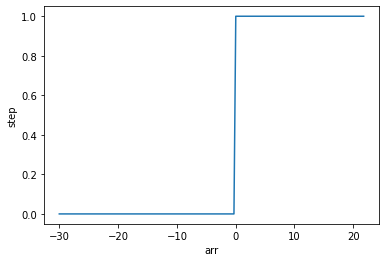

In [7]:
sns.lineplot(x = df['arr'], y = df['step'])

In [38]:
class Perceptron():
  def __init__(self, lr = 1, epochs = 100):
    self.epochs = epochs
    self.lr = lr
    
  def step(self, val):
    if val >= 0:
      return 1
    return 0 

  def predict(self, test_x):
    # print(self.weights.shape, test_x.shape)
    z = np.dot(self.weights.T, test_x)
    # print(z)
    a = self.step(z)
    return a
 
  def fit(self, train_x, train_y):
    # print(train_x, train_x.shape)
    train_x = np.insert(train_x, 0, 1, axis = 1)
    # print(train_x, train_x.shape)
    self.weights = np.zeros(train_x.shape[1])
    for epoch in range(self.epochs):
      for i in range(train_x.shape[0]):
        y = self.predict(train_x[i])
        error = train_y[i] - y
        self.weights += self.lr * error * train_x[i]
    return self 

#OR GATE

In [37]:
input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target = np.array([0, 1, 1, 1])
obj = Perceptron()
params = obj.fit(input, target)
print("Bias = ", params.weights[0], "Weights = ", params.weights[1:])
print("predicted Value", obj.predict(np.array([1, 1, 0])))

Bias =  -1.0 Weights =  [1. 1.]
predicted Value 1


#AND GATE

In [34]:
input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target = np.array([0, 0, 0, 1])
obj = Perceptron()
params = obj.fit(input, target)
print("Bias = ", params.weights[0], "Weights = ", params.weights[1:])
print("predicted Value", obj.predict(np.array([1, 0, 0])))

Bias =  -3.0 Weights =  [2. 1.]
predicted Value 0


#XOR GATE

In [29]:
input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target = np.array([0, 1, 1, 0])
obj = Perceptron()
params = obj.fit(input, target)
print("Bias = ", params.weights[0], "Weights = ", params.weights[1:])
print("predicted Value", obj.predict(np.array([1, 1, 0])))

Bias =  0.0 Weights =  [-1.  0.]
predicted Value 0
